In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pl

In [2]:
header = np.loadtxt ('fisher.csv', dtype = np.str_, max_rows = 1, delimiter = ';')
print (header)

['ï»¿Type' 'PW' 'PL' 'SW' 'SL']


In [3]:
input = np.loadtxt ('fisher.csv', skiprows = 1, delimiter = ';')

In [4]:
print (input.shape)

(150, 5)


In [5]:
Xtilde = input [:, 1:]
m, n = Xtilde.shape
print (m)
print (n)

150
4


In [6]:
Types = input [:, 0] .astype (int)

In [7]:
colortable = np.array (['red', 'magenta', 'blue'])
colors = colortable [Types]

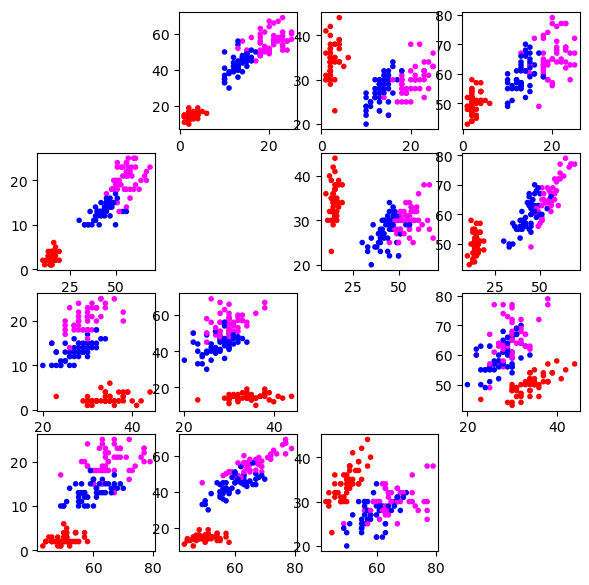

In [8]:
pl.figure (figsize = (7, 7))
i = 0
for j in range (4):
    for k in range (4):
        i += 1
        if j != k:
            pl.subplot (4, 4, i)
            pl.scatter (Xtilde [:, j], Xtilde [:, k], marker = '.', c = colors)

In [9]:
M = np.eye (m) - np.ones ((m, m)) / m
X = M @ Xtilde

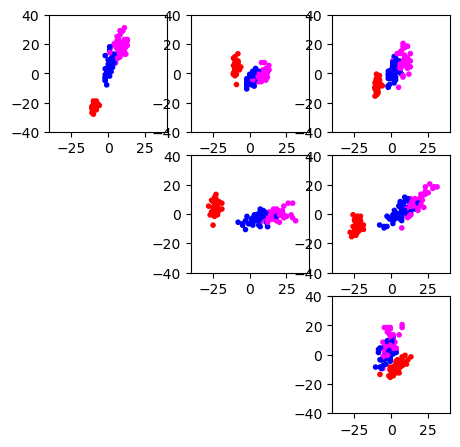

In [10]:
pl.figure (figsize = (7, 7))
i = 0
for j in range (4):
    for k in range (4):
        i += 1
        if j < k:
            pl.subplot (4, 4, i)
            pl.scatter (X [:, j], X [:, k], marker = '.', c = colors)
            pl.xlim ([-40, 40])
            pl.ylim ([-40, 40])

In [11]:
C = X.T @ X / (m - 1)
print (np.round (C, 4))

[[ 57.2899 128.6151 -12.1471  50.9189]
 [128.6151 315.9945 -33.8476 128.002 ]
 [-12.1471 -33.8476  19.1213  -4.1683]
 [ 50.9189 128.002   -4.1683  68.3696]]


In [12]:
EW, EV = la.eig (C)

In [13]:
print (EW)

[425.63038583   2.75778126   7.8058581   24.58123209]


In [14]:
print (EV)

[[ 0.35269671  0.71329751 -0.60183918 -0.06783287]
 [ 0.85973502 -0.47811482 -0.04317731 -0.17434916]
 [-0.08580835 -0.3688495  -0.56965949  0.72943474]
 [ 0.35930162  0.35575684  0.55804426  0.65797115]]


In [15]:
Y = X @ EV
print (Y.shape)

(150, 4)


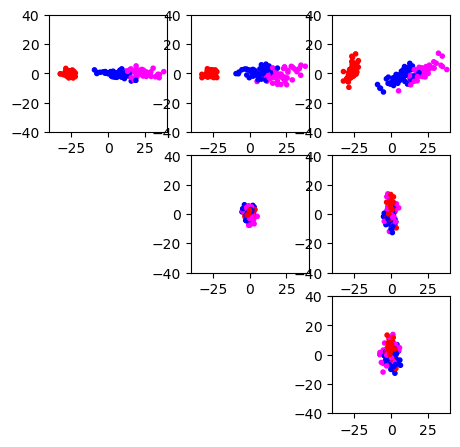

In [16]:
pl.figure (figsize = (7, 7))
i = 0
for j in range (4):
    for k in range (4):
        i += 1
        if j < k:
            pl.subplot (4, 4, i)
            pl.scatter (Y [:, j], Y [:, k], marker = '.', c = colors)
            pl.xlim ([-40, 40])
            pl.ylim ([-40, 40])

In [17]:
CC = Y.T @ Y / (m - 1)
print (np.round (CC, 4))

[[425.6304   0.       0.      -0.    ]
 [  0.       2.7578  -0.      -0.    ]
 [  0.      -0.       7.8059  -0.    ]
 [ -0.      -0.      -0.      24.5812]]


In [18]:
U, Sigma, VT = la.svd (C)
Sigma
print (U.shape)
print (VT.shape)

(4, 4)
(4, 4)


In [19]:
Z = X @ VT.T

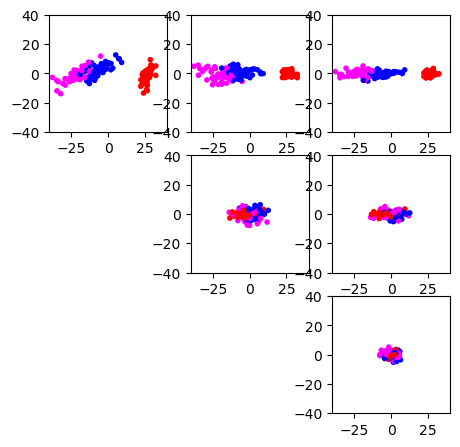

In [20]:
pl.figure (figsize = (7, 7))
i = 0
for j in range (4):
    for k in range (4):
        i += 1
        if j < k:
            pl.subplot (4, 4, i)
            pl.scatter (Z [:, j], Z [:, k], marker = '.', c = colors)
            pl.xlim ([-40, 40])
            pl.ylim ([-40, 40])